# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd
import numpy as np
# from warnings import filterwarnings
# filterwarnings('ignore')
train = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_csv('orange_small_churn_labels.train', header=None)
df = train.copy()
df['labels'] = labels

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 231 entries, Var1 to labels
dtypes: float64(191), int64(2), object(38)
memory usage: 70.5+ MB


2\. Рассчитайте доли классов `отток` и `не отток`.

In [2]:
# Применяем встроенную функцию с параметром normalize=True
labels[0].value_counts(normalize=True)

-1    0.9256
 1    0.0744
Name: 0, dtype: float64

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

**Поскольку признаки и целевая функция имеют разные типы (численный или категориальный для признаков и бинарный для ответов). Поэтому корреляции Пирсона и Спирмена применять нельзя. Можно посчитать меру силы взаимосвязи по формуле**
$$E(X1 |X2 = 1)−E(X1 |X2 = -1)$$
**Матожидание в выборке приблизим средним, тогда получим**
$$\frac{\sum_{i=1}^n{{(x_{i}|y_{i}=1)}}}{k} - \frac{\sum_{i=1}^n{{(x_{i}|y_{i}=-1)}}}{\ell}$$
где $k$ - количество наблюдений с $y=1$, а $\ell$ - количество наблюдений с $y=-1$

**Можно взять от полученных значений модуль, т.к. большое отрицательное значение будет характеризовать обратную взаимосвязь и отсортировать значения по убыванию**

In [3]:
from sklearn.preprocessing import StandardScaler
def scale_frame(df):
    """Функция скалирует df на [0,1]"""
    scaler = StandardScaler()
    scaled_matrix = scaler.fit_transform(df.values)
    return pd.DataFrame(scaled_matrix, columns=df.columns)

In [4]:
# Отскалируем данные, чтобы было удобно сравнивать корреляции. Также оставим только числовые признаки
train_num = scale_frame(df[train.select_dtypes(exclude=['object']).columns])

/home/romas/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/romas/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [5]:
#Поделим датасет на два: churn - только отток, not_churn - только не отток. 
churn = pd.DataFrame(train_num[df.labels == 1])
not_churn = pd.DataFrame(train_num[df.labels == -1])
print(churn.shape, not_churn.shape)

(2976, 192) (37024, 192)


In [6]:
# Воспользуемся встроенной функцией describe, от полученного датафрейма возьмем среднее значение mean, 
# оно же .iloc[1] и посчитаем разность этих значений. 
# Для дальнейшего сравнения возьмем абсолютное значение np.abs() с сложим всё в corrarr
corrarr = (churn.describe().iloc[1] - not_churn.describe().iloc[1]).apply(np.abs)

In [7]:
# Sort values and drop na values
corrarr = corrarr.sort_values(ascending=False)
corrarr.dropna(inplace=True)

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [8]:
# Тут немного поломался matplotlib
import matplotlib
import seaborn as sns
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
top_idx = list(corrarr.head(20).index) #Список 20ти наиболее скоррелированных
bottom_idx = list(corrarr.tail(10).index) # Список 10ти наименее скоррелированных
rest_idx = list(corrarr.index[20:-10]) # Список оставшихся 

In [10]:
# Сделаем датафрейм для графиков
df_corr_top = df[top_idx].copy()
df_corr_top['labels'] = labels

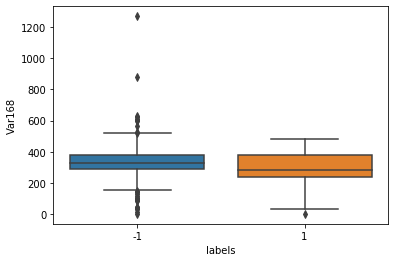

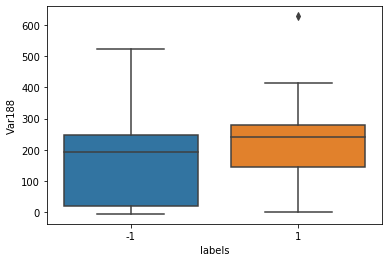

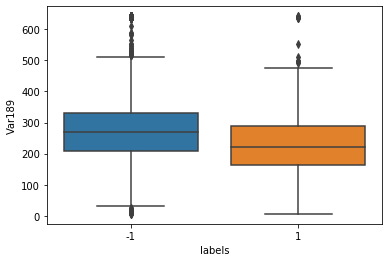

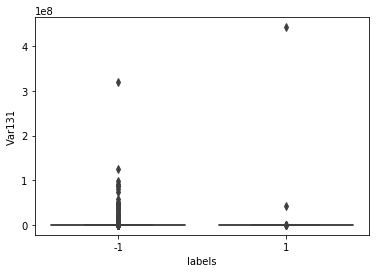

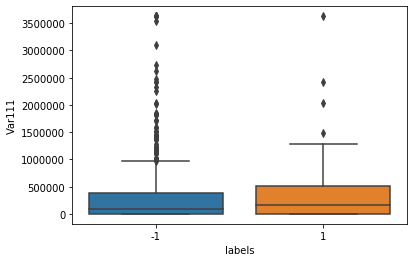

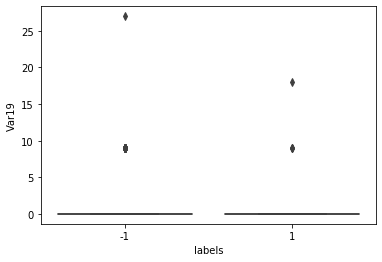

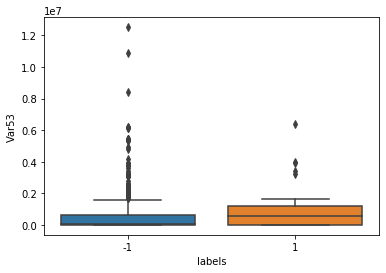

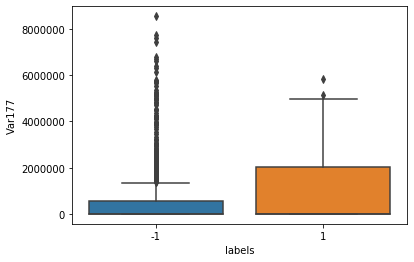

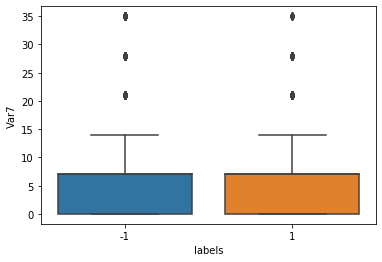

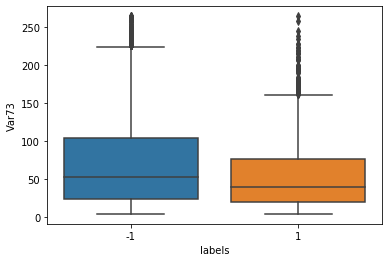

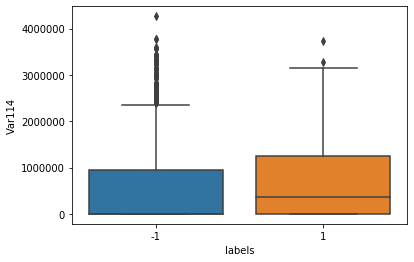

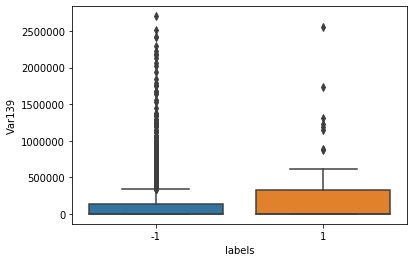

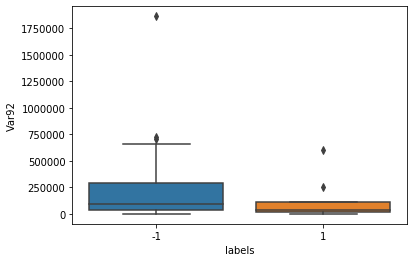

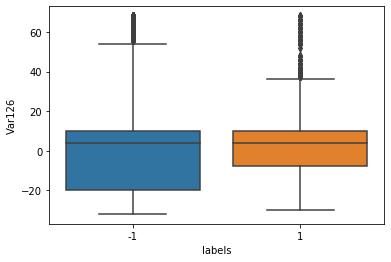

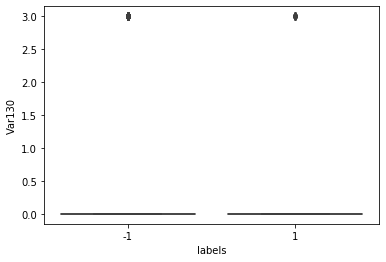

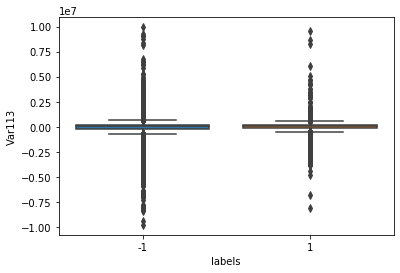

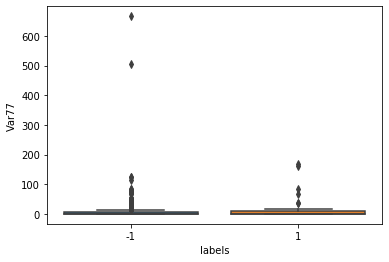

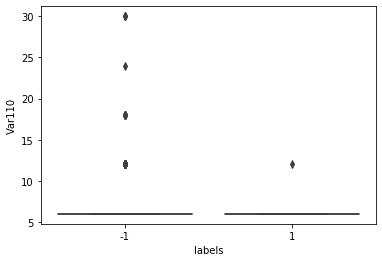

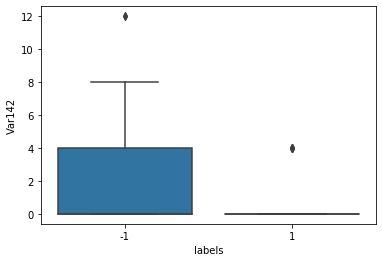

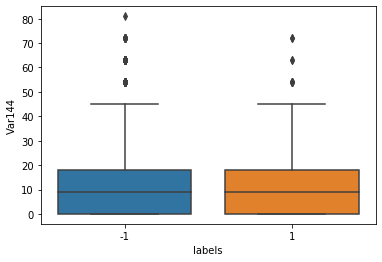

In [11]:
for var in top_idx:
    sns.boxplot(x='labels', y=var, data=df_corr_top);
    plt.show() # нужно чтобы не показывался только последний график

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [12]:
idx_list = np.random.randint(0,len(rest_idx) + 1, 10) # Сгенерируем список случайных индексов длиной 10

In [13]:
rand_cols = [rest_idx[i] for i in idx_list] # Сделаем список имен колонок

In [14]:
df_corr_random = df[rand_cols].copy()
df_corr_random['labels'] = labels

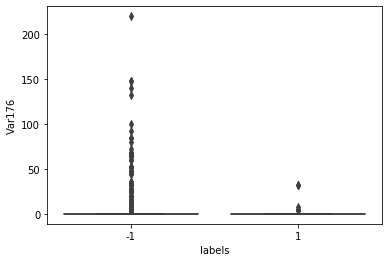

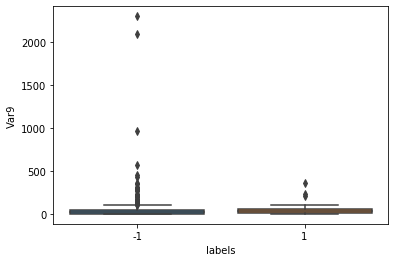

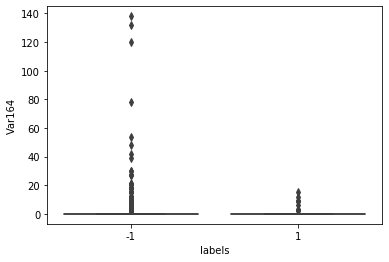

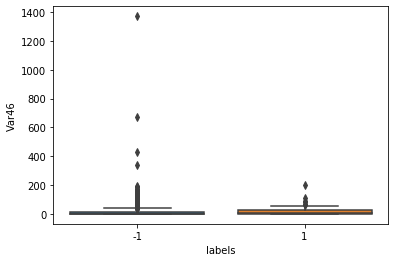

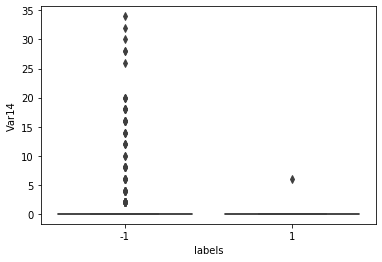

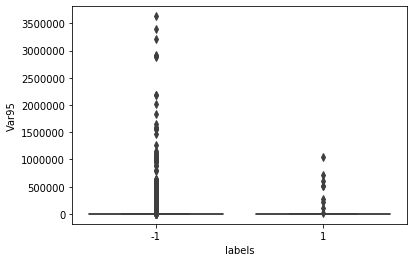

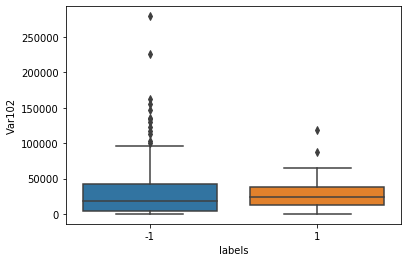

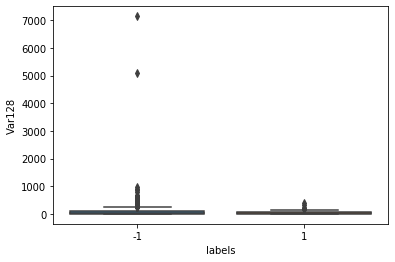

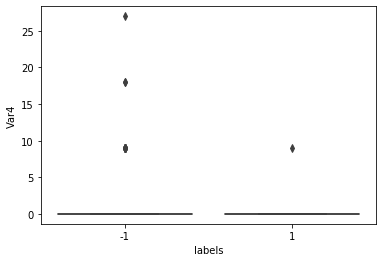

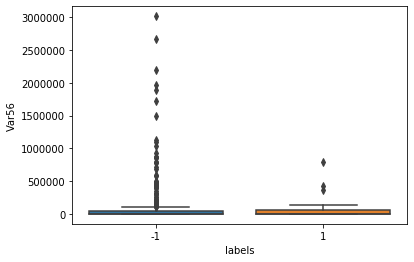

In [15]:
for var in rand_cols:
    sns.boxplot(x='labels', y=var, data=df_corr_random);
    plt.show() # нужно чтобы показывался НЕ только последний график

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [16]:
df_corr_bottom = df[bottom_idx].copy()
df_corr_bottom['labels'] = labels

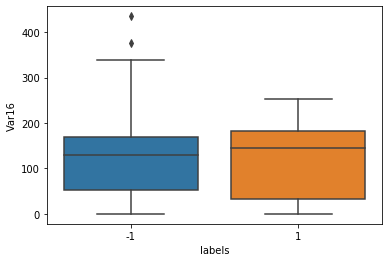

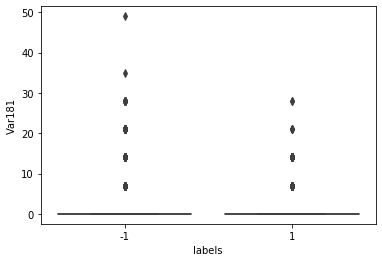

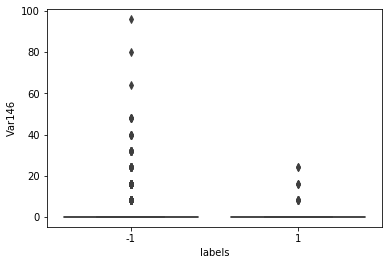

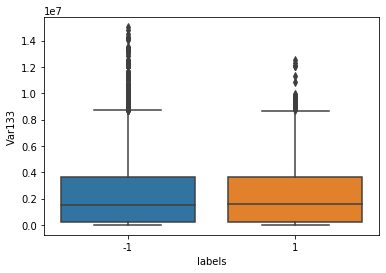

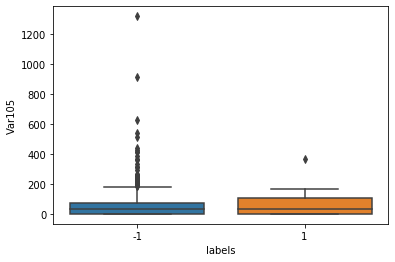

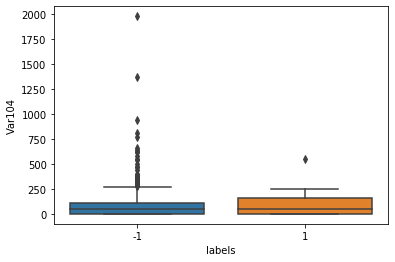

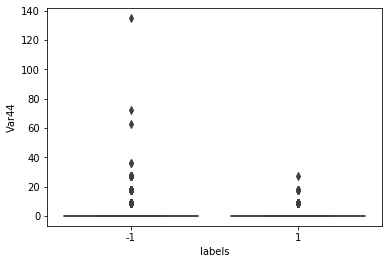

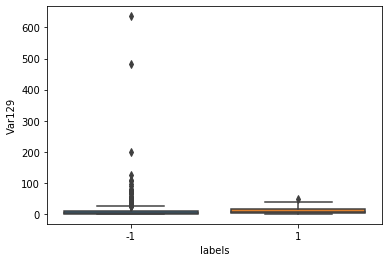

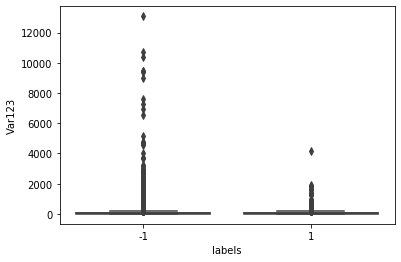

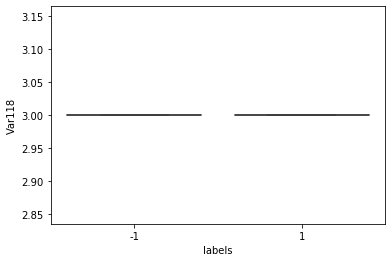

In [17]:
for var in bottom_idx:
    sns.boxplot(x='labels', y=var, data=df_corr_bottom);
    plt.show() # нужно чтобы не показывался только последний график

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [19]:
train_cat = df[train.select_dtypes(include=['object']).columns]
train_cat['labels'] = df.labels

/home/romas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


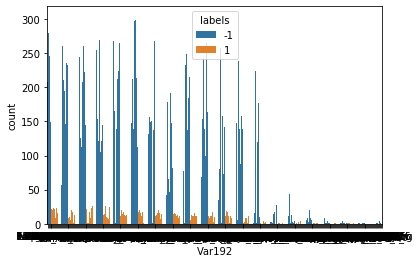

In [20]:
sns.countplot(x='Var192', data=train_cat, hue='labels')

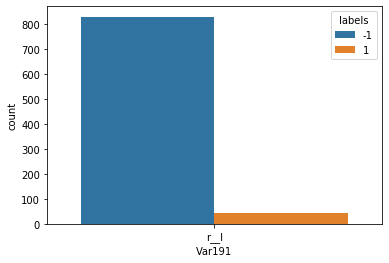

In [21]:
sns.countplot(x='Var191', data=train_cat, hue='labels')

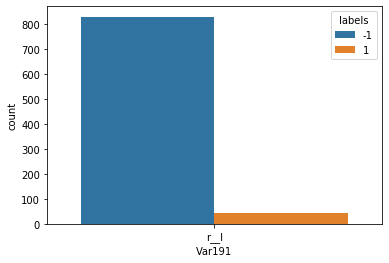

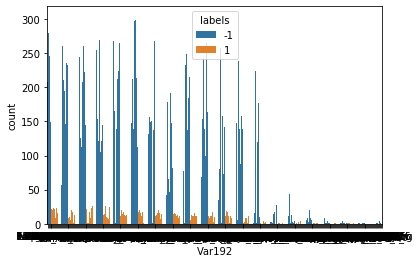

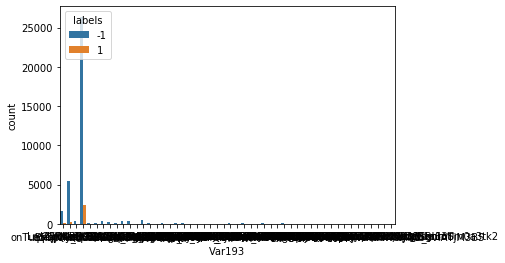

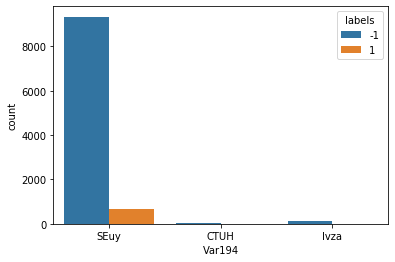

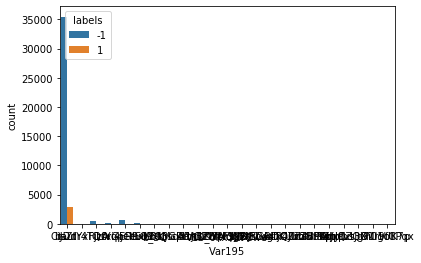

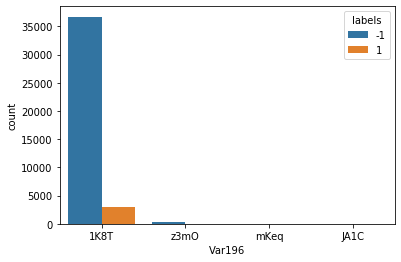

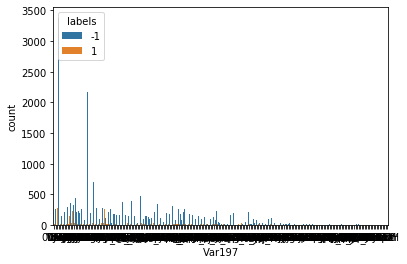

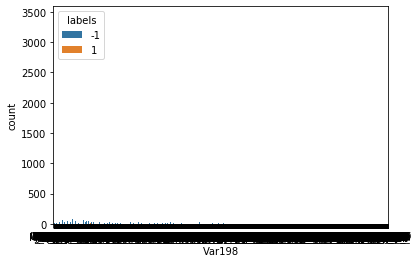

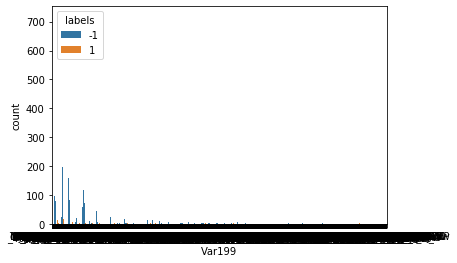

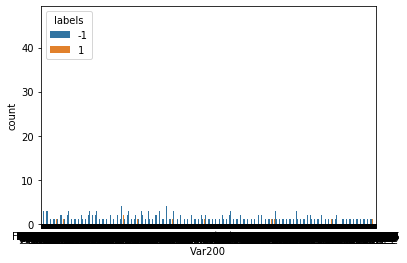

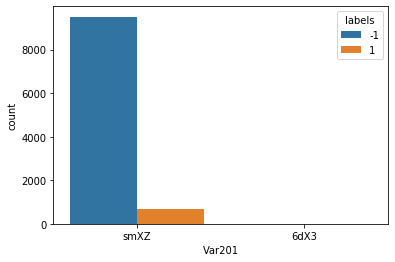

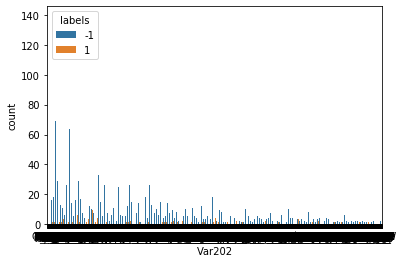

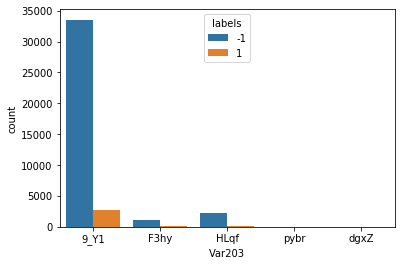

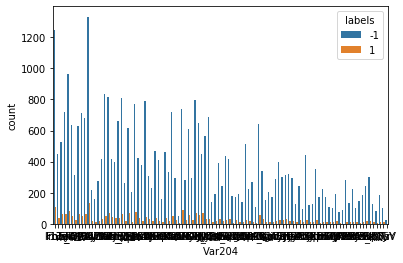

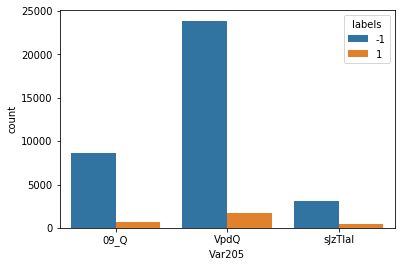

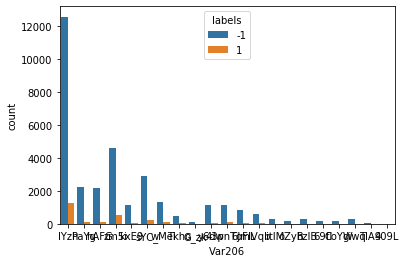

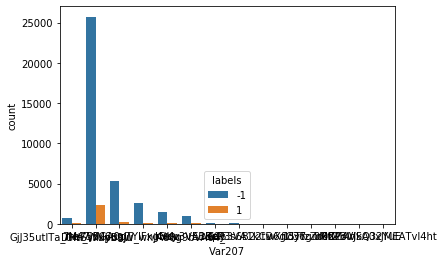

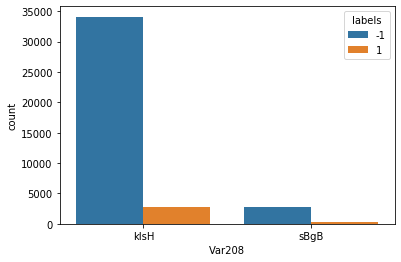

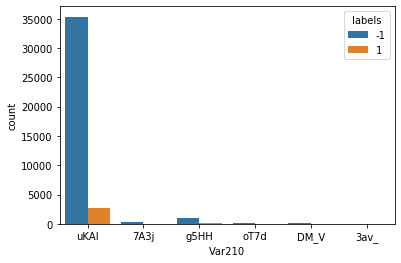

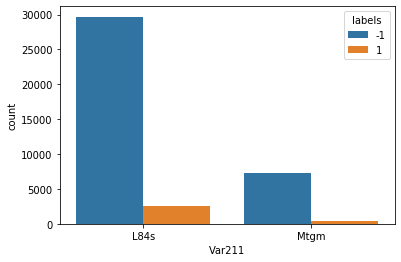

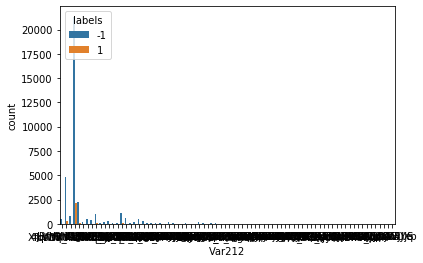

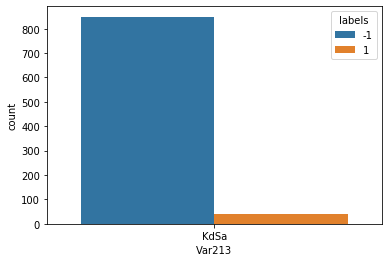

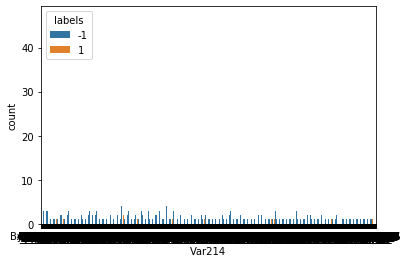

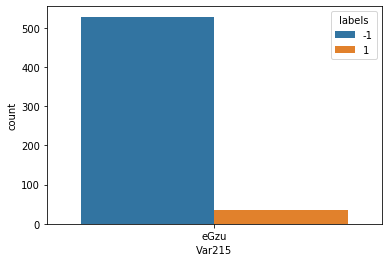

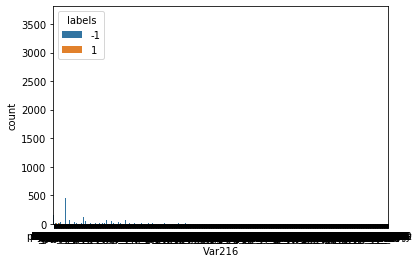

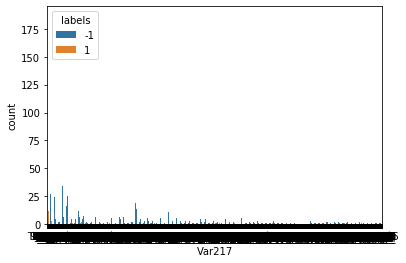

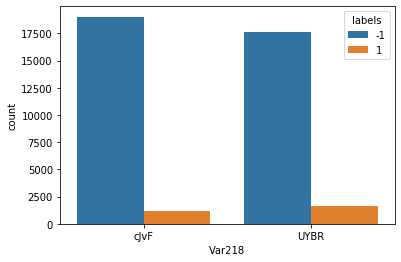

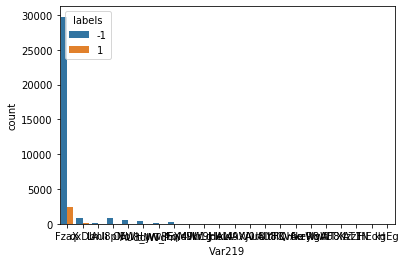

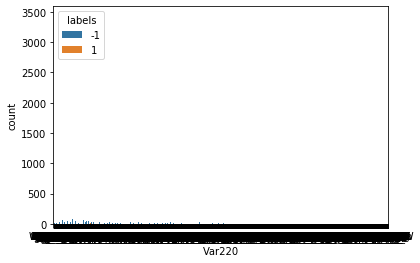

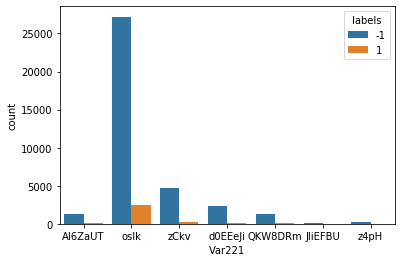

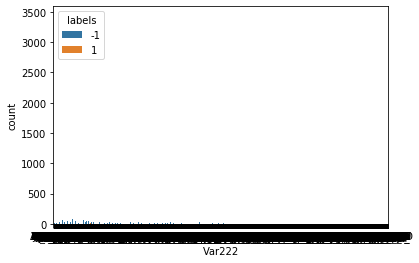

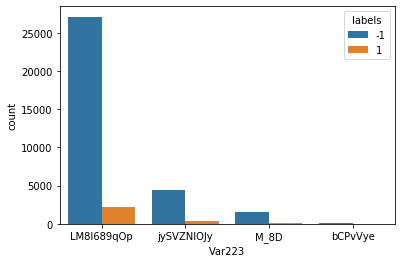

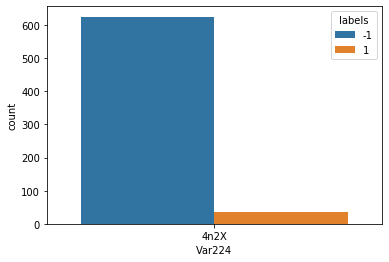

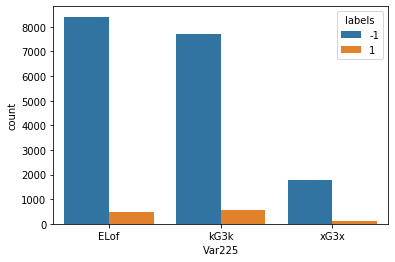

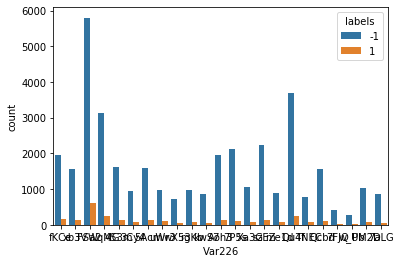

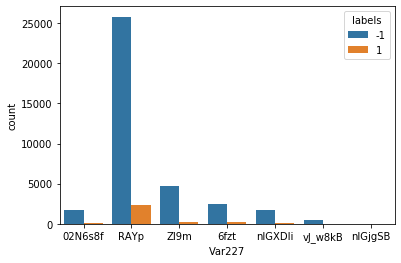

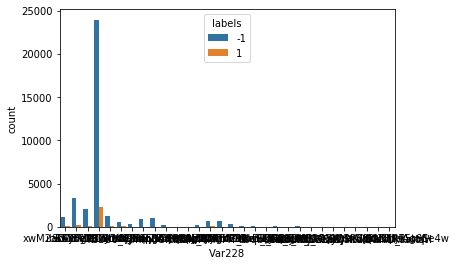

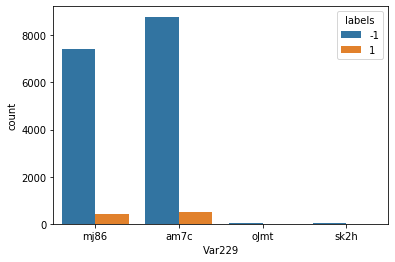

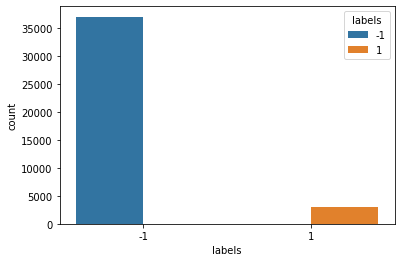

In [22]:
for i in train_cat.columns:
    sns.countplot(x=i, data=train_cat, hue='labels')
    plt.show()

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Выводы:
Очень несбалансированная выборка. Есть корреляция между признаками. Есть константные признаки, есть полностью пропущенные признаки, есть признаки где много пропущенных значений. Наименее полезными будут признаки распределение в которых абсолютно идентично для классов churn и not churn. 
Отбор признаков будет полезен для построения модели.

Ниже я использовал библиотеку pandas_profiling для более широкого анализа данных

In [22]:
import pandas_profiling as pp
report = pp.ProfileReport(df)

/home/romas/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [29]:
report

In [28]:
report.get_rejected_variables()

['Var22',
 'Var61',
 'Var62',
 'Var63',
 'Var66',
 'Var71',
 'Var77',
 'Var88',
 'Var91',
 'Var96',
 'Var101',
 'Var105',
 'Var107',
 'Var115',
 'Var121',
 'Var127',
 'Var128',
 'Var129',
 'Var145',
 'Var148',
 'Var151',
 'Var156',
 'Var157',
 'Var160',
 'Var166',
 'Var174',
 'Var179',
 'Var187']

In [ ]:
sns_pplot = sns.pairplot(train_num.dropna(), hue='labels')